In [35]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LinearRegression, Lars, ElasticNet, Lasso, Ridge, BayesianRidge
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
import cufflinks as cf
import pandas as pd
import numpy as np
import emoji
import re
from wordcloud import WordCloud, STOPWORDS
import nltk
import matplotlib.pyplot as plt
import matplotlib

In [2]:
data= pd.read_csv('betsentiment-ES-tweets-sentiment-teams.csv', encoding='latin1')

In [3]:
data

,tweet_date_created,tweet_id,tweet_text,language,sentiment,sentiment_score
0,2018-08-08T13:09:15.489000,1027179935184703489,"Alisson puede estar más tranquilo, no cargará ...",es,POSITIVE,"{""Neutral"":0.082259356975555419921875,""Negativ..."
1,2018-08-08T18:27:37.320000,1027260056092344320,@iPincheViky @ChelseaFC Es que el director eje...,es,NEUTRAL,"{""Neutral"":0.827011644840240478515625,""Negativ..."
2,2018-08-12T14:59:31.520000,1028657238116843520,Upto £100 #freebets &gt; https://t.co/cbjeMXI9...,es,NEUTRAL,"{""Neutral"":0.930982112884521484375,""Negative"":..."
3,2018-08-04T13:23:30.257000,1025733971320160257,"Bobby Duncan, primo de Steven Gerrard, deja la...",es,NEUTRAL,"{""Neutral"":0.906872212886810302734375,""Negativ..."
4,2018-07-28T11:21:06.480000,1023166450981396480,@TorreiraForeva @lepvtron @Arsenal @IntChampio...,es,NEUTRAL,"{""Neutral"":0.942405760288238525390625,""Negativ..."
...,...,...,...,...,...,...
132702,2018-08-10T21:57:11.345000,1028037572671545345,Apunta el diario Mirror que el #ManchesterUnit...,es,NEUTRAL,"{""Neutral"":0.90301716327667236328125,""Negative..."
132703,2018-08-18T04:57:47.448000,1030680133189992448,@andresmarocco @sscnapoli @D_Ospina1 @Arsenal ...,es,NEUTRAL,"{""Neutral"":0.73134517669677734375,""Negative"":0..."
132704,2018-09-16T16:54:09.904000,1041369661399547904,Final del partido @Everton 1 vs @WestHamEspano...,es,NEUTRAL,"{""Neutral"":0.9575507640838623046875,""Negative""..."
132705,2018-07-26T01:58:04.409000,1022299986762129409,"Amistoso, champions o Liga; el city es la perr...",es,NEUTRAL,"{""Neutral"":0.93621218204498291015625,""Negative..."


In [5]:
data['sentiment'].unique()

array(['POSITIVE', 'NEUTRAL', 'NEGATIVE', 'MIXED'], dtype=object)

In [6]:
data[['NEUTRAL', 'NEGATIVE','POSITIVE', 'MIXED']] = data.sentiment_score.str.split(",",expand=True)

In [8]:
data['NEUTRAL']=data['NEUTRAL'].str.extract('([0-9].[0-9]+)', expand=False)
data['NEGATIVE']=data['NEGATIVE'].str.extract('([0-9].[0-9]+)', expand=False)
data['POSITIVE']=data['POSITIVE'].str.extract('([0-9].[0-9]+)', expand=False)
data['MIXED']=data['MIXED'].str.extract('([0-9].[0-9]+)', expand=False)

In [10]:
data.drop(['sentiment_score','tweet_date_created','language'], axis=1, inplace=True)

In [11]:
import emoji
import re
data[f"tweet_mensaje"] = data[f"tweet_text"].str.len()
data[f"n_emojis"] = data[f"tweet_text"].map(emoji.emoji_count)
data[f"n_lower"] = data[f"tweet_text"].map(lambda x:sum(map(str.islower, x)))
data[f"n_upper"] = data[f"tweet_text"].map(lambda x:sum(map(str.isupper, x)))
data[f"n_digit"] = data[f"tweet_text"].map(lambda x:sum(map(str.isdigit, x)))
data[f"n_whitespaces"] = data[f"tweet_text"].map(lambda x:len(re.findall("\s", x)))
data[f"n_words"] = data[f"tweet_text"].str.split(" ").str.len()
data[f"n_tags"] = data[f"tweet_text"].str.lower().str.contains("@").astype(int)
data[f"n_urls"] = data[f"tweet_text"].str.lower().str.contains("http").astype(int)

In [37]:
data

,tweet_id,tweet_text,sentiment,NEUTRAL,NEGATIVE,POSITIVE,MIXED,tweet_mensaje,n_emojis,n_lower,n_upper,n_digit,n_whitespaces,n_words,n_tags,n_urls,tweet_clean
0,1027179935184703489,"Alisson puede estar más tranquilo, no cargará ...",POSITIVE,0.082259356975555419921875,0.0365360490977764129638671875,0.7459237575531005859375,0.1352808773517608642578125,152,0,114,6,0,28,29,1,0,alisson puede estar mas tranquilo no cargara c...
1,1027260056092344320,@iPincheViky @ChelseaFC Es que el director eje...,NEUTRAL,0.827011644840240478515625,0.078549765050411224365234375,0.071943394839763641357421875,0.02249521203339099884033203125,80,0,55,8,0,10,11,1,0,es que el director ejecutivo es mujer so jajaj...
2,1028657238116843520,Upto £100 #freebets &gt; https://t.co/cbjeMXI9...,NEUTRAL,0.930982112884521484375,0.03142802417278289794921875,0.030183732509613037109375,0.00740610249340534210205078125,132,0,91,5,7,10,11,0,1,upto 100 freebets gt lol gunners matchedbettin...
3,1025733971320160257,"Bobby Duncan, primo de Steven Gerrard, deja la...",NEUTRAL,0.906872212886810302734375,0.057496130466461181640625,0.02487484179437160491943359375,0.0107567794620990753173828125,121,0,84,11,1,16,17,0,1,bobby duncan primo de steven gerrard deja la c...
4,1023166450981396480,@TorreiraForeva @lepvtron @Arsenal @IntChampio...,NEUTRAL,0.942405760288238525390625,0.031377367675304412841796875,0.02038344927132129669189453125,0.005833382718265056610107421875,82,0,62,8,0,8,9,1,0,leon bailey or federico cheisa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132702,1028037572671545345,Apunta el diario Mirror que el #ManchesterUnit...,NEUTRAL,0.90301716327667236328125,0.0689884722232818603515625,0.0136363618075847625732421875,0.014357940293848514556884765625,182,0,131,14,2,25,26,0,1,apunta el diario mirror que el manchesterunite...
132703,1030680133189992448,@andresmarocco @sscnapoli @D_Ospina1 @Arsenal ...,NEUTRAL,0.73134517669677734375,0.014611036516726016998291015625,0.211622774600982666015625,0.0424210168421268463134765625,288,0,213,15,1,46,47,1,0,lo mejor que le puede pasar a ospina es que le...
132704,1041369661399547904,Final del partido @Everton 1 vs @WestHamEspano...,NEUTRAL,0.9575507640838623046875,0.0062728635966777801513671875,0.03307616710662841796875,0.00310012488625943660736083984375,94,0,58,16,3,12,13,1,0,final del partido 1 vs 3 jornada 5 premierxespn
132705,1022299986762129409,"Amistoso, champions o Liga; el city es la perr...",NEUTRAL,0.93621218204498291015625,0.032482467591762542724609375,0.0226986408233642578125,0.008606786839663982391357421875,67,0,46,7,0,11,12,0,0,amistoso champions o liga el city es la perra ...


In [62]:
def get_data_cw(data, sentiment, fr=0.30):
    from nltk.corpus import stopwords
    df_dample = data.loc[data["sentiment"] == sentiment]
    df_sample = df_dample.sample(frac=fr)
    
    comment_words = ''
    stopwords = set(stopwords.words('spanish'))

    # iterate through the csv file
    for val in df_sample.tweet_clean:

        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)
    for k, v in wordcloud.words_.items():
        if v > 0.1:
            print(k)

    # plot the WordCloud image                       
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

In [60]:
get_data_cw(data, "POSITIVE")

ma
mejor
bien
equipo
si
gran
gracia
bueno
temporada
chelsea
hoy
futbol
partido
vamos
buen
final
buena
va
ver
ynwa
ano
siempre
grande
mufc
jugador
liverpool
ser
ahora
feliz
excelente
premierleague
arsenal
mundo
asi
juego
jugar
lfc
dia
ojala
crack
cfc
gol
gusta
solo
premier
creo
goles
club
campeon
espero
hace
victoria
everton
mucha suerte
fichaje
exito
saludo
jugadores
puede
mucha
amo
tan
suerte
q
ganar
felicidades
tambien
champion
nuevo
aqui
cosa
sera
toda
camiseta
quiero
gana
sarri
dio
tiempo
mejores
nunca
parece
hacer
minuto
momento
merece
mancity
vaya
fin
v
parte
hecho
da
sigue
tener
increible
portero
calidad
nivel
despues
manchesterunited
semana
sido
championsleague
historia
gano
do
menos
queda
defensa
lindo
encanta
seguro
mundial
tottenham
abrazo
hazard
juega
klopp
verdad
bonito


chelsea
partido
premierleague
arsenal
equipo
si
ma
temporada
final
liverpool
ano
gol
hoy
fichaje
everton
gole
manchesterunited
va
tottenham
futbol
jugador
club
v
mejor
oficial
minuto
millone
ahora
solo
dia
premier league
nuevo jugador
asi
lfc
inglaterra
victoria
tra
jugadores
sera
tambien
yerry mina
q
vamo
ser
manchestercity
juego
premier
ver
do
championsleague
realmadrid
gran
manana
liga
gana
mundo
mancity
westham
sigue
via
manchester united
mufc
manchester city
grande
siempre
euro
mourinho
gano
cambio
nuevo
despues
jugar
campeon
bien
hace
puede
ucl
ganar
llega
madrid
titular
historia
ynwa
aqui
mundial
defensa
football soccer
fecha
champion
portero
hazard
menos
toda
juega
video
pretemporada
punto
sarri
pred fifa18
momento
cfc
quiere
contrato
estan
t co
real madrid
frente
acuerdo
oferta
delantero
creo
debut
titulo
https t
seria
red
grupo
courtois
saludo
paso
empate
jornada
hacer
roma
semana
pl
barcelona
gracia
europa
championscup pred
triunfo
mismo
casa
hora
epl
soccer futbol
encuentro

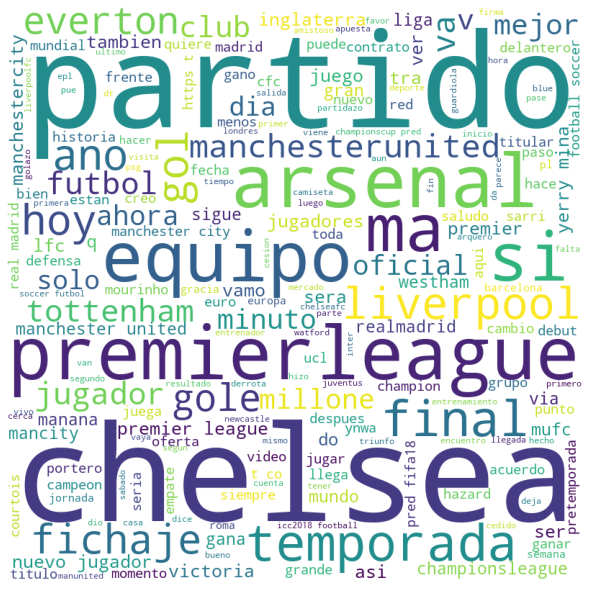

In [64]:
get_data_cw(data, "NEUTRAL")

si
ma
equipo
q
va
partido
mal
solo
arsenal
ano
chelsea
mierda
asi
mejor
hace
jugador
parece
jugar
creo
ser
jugadores
club
ver
final
temporada
bien
tan
mourinho
ahora
falta
mufc
siempre
hacer
hoy
puta
futbol
liverpool
estan
menos
peor
van
premierleague
cosa
da
puede
nadie
vaya
dos
ir
fichaje
bueno
mismo
defensa
ojala
dia
juego
tener
everton
gol
nunca
malo
ynwa
mundial
hijo
sera
mala
aun
veo
champion
error
juega
madrid
lfc
pues
puto
verdad
manchesterunited
grande
toda
claro
tiempo
quiere
problema
tambien
millones
quiero
despues
goles
gran
pena
igual
gana
sigue
dio
pendejo
hizo
vez
aqui
minuto
verguenza
vale
espero
mucha
tecnico
sabe
liga
vamo
pobre
decir
hecho
dinero
ahi
nivel


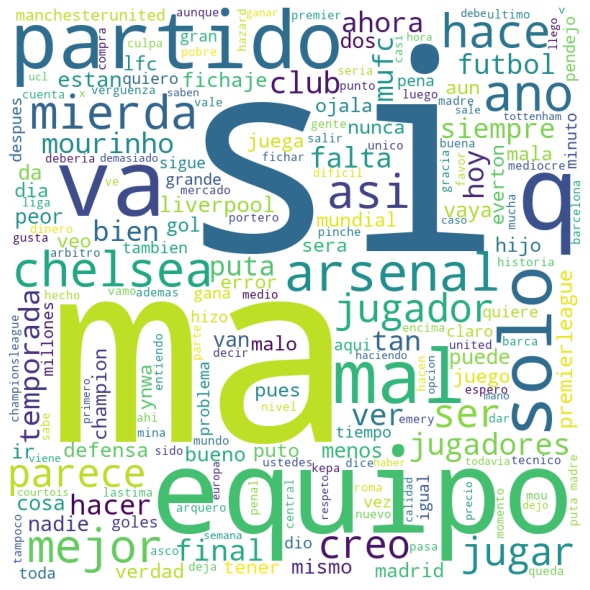

In [63]:
get_data_cw(data, "NEGATIVE")

In [29]:
data['tweet_clean']=[" ".join(filter(lambda x:x[0:4]!='http' and x[0]!='@', x.split())) for x in data[f"tweet_text"]]

In [83]:
def get_file_words():
    neg = pd.read_csv("/home/bluestrk/Documentos/data_science/module_five/last_pr/last_pr/hello_world/data/neg.csv", header=None)
    neg.columns = ["word",]
    neu = pd.read_csv("/home/bluestrk/Documentos/data_science/module_five/last_pr/last_pr/hello_world/data/neu.csv")
    neu.columns = ["word",]
    pos = pd.read_csv("/home/bluestrk/Documentos/data_science/module_five/last_pr/last_pr/hello_world/data/pos.csv")
    pos.columns = ["word",]
    
    return set(neg["word"]), set(neu["word"]), set(pos["word"])

In [84]:
negw, neuw, posw = get_file_words()

In [99]:
def count_personal_words(tweet, n, nt, p):
    positive = 0
    neutral = 0
    negative = 0
    tweet_list = tweet.split(' ')
    for w in n:
        if w in tweet_list:
            negative += 1
    for w in nt:
        if w in tweet_list:
            neutral += 1
    for w in p:
        if w in tweet_list:
            positive += 1
            
    return pd.Series((positive, neutral, negative))

In [100]:
tw = "sufre su primer empate ante el Wolverhamton, qui ́en pego primero con gol de Boly, pero Laporte puso tablas en el Molineux Stadium. Los sky blues "
p, nt, n = count_personal_words(tw, negw, neuw, posw)
print(p, nt, n)

1 2 2


In [102]:
data["count_personal_positive"], data["count_personal_neutral"], data["count_personal_negative"] = data["tweet_clean"].map(lambda x: count_personal_words(x,  negw, neuw, posw))

ValueError: too many values to unpack (expected 3)

In [ ]:
data

In [30]:
import re, unicodedata
##quita acentos,vuelve todo a minúsculas y se quitan signos 
def clean_words(text):
    res =  unicodedata.normalize('NFD', text).encode('ascii', 'ignore')
    res = re.sub("[^a-zA-Z0-9 ]"," ", res.decode("utf-8"), flags=re.UNICODE)
    res =  u' '.join(res.lower().split())
    return res

In [31]:
data['tweet_clean']=data['tweet_clean'].map(clean_words)

In [ ]:
vect = CountVectorizer(stop_words=stopwords.words("spanish"), ngram_range=(1, 1), min_df=1, max_features=100)

In [ ]:
vect.fit(data["tweet_clean"])

In [ ]:
tweets = data.drop(columns=["tweet_clean"]).reset_index().join(pd.DataFrame(data = vect.transform(data["tweet_clean"]).todense(), columns=vect.get_feature_names()))

In [ ]:
tweets

In [ ]:
tweets.drop(['index','tweet_id','tweet_text','sentiment'], axis=1, inplace=True)

In [ ]:
tweets

In [ ]:
target=['NEUTRAL', 'NEGATIVE','POSITIVE', 'MIXED']

In [ ]:
ls_predict=[x for x in tweets.columns if x not in target]

In [ ]:
X=tweets[ls_predict]
y=tweets[["MIXED"]]

In [ ]:
#y=y.values.reshape(-1,1)

In [ ]:
X

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
mm_x = MinMaxScaler()
Xs = mm_x.fit_transform(X_train)

In [ ]:
mm_y = MinMaxScaler()
ys = mm_y.fit_transform(y_train)

In [ ]:
linreg = Ridge()

In [ ]:
ls_results = cross_val_score(X=Xs, y=ys, cv=4, n_jobs=-1, scoring="r2", estimator=linreg)

In [ ]:
np.mean(ls_results), np.std(ls_results)

In [ ]:
linreg = LinearRegression()

In [ ]:
linreg.fit(X_train, y_train)

In [ ]:
linreg.score(X_test, y_test)